# Ecuaciones elipticas.

La ecuacion es:

$$ \nabla^2 u(x,y) = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \rho(x,y)$$

Esta ecuacion se conoce como la ecuacion de Poisson. Cuando $\rho(x,y) = 0$ se conoce como la ecuacion de Laplace.

## Aplicaciones:
* Encontrar la forma de una membrana.
* Resolver el problema de calor estacionario (por que la derivada con respecto al tiempo 0).
* Sirve para encontrar el potencial de un campo electrico.
* Entre otras.

Notacion
$$(x,y) \in (a,b) \times (c,d) $$ con condiciones de frontera Direchlet para funciones en la frontera $[a,y] \cup [b,y] \cup [x,c] \cup  [x,d] $.


vamos a usar las representaciones centrales en ambas variables.

$$\frac{w_{i+1 j} - 2 w_{ij} + w_{i-1 j}}{\Delta x^2}
 + \frac{w_{i j+1} - 2 w_{ij} + w_{i j-1}}{\Delta y^2} = \rho_{ij}\tag{1} $$

El error espacial es de la forma $\mathcal{O}(\Delta x^2) + \mathcal{O}(\Delta y^2)$.


Clas condiciones de frontera.

$$ w_{0j} = e_j   \quad , \quad j=0,1, \cdots, ny $$
$$ w_{nj} = f_j   \quad , \quad j=0,1, \cdots, ny $$
$$ w_{i0} = g_i   \quad , \quad i=0,1, \cdots, nx $$
$$ w_{iny} = h_i   \quad , \quad i=0,1, \cdots, nx $$

Ahora de la Ecuacion (1), multiplicando todo por $\Delta x^2$

$$ w_{i+1 j} - 2 w_{ij} \left (  1 + \frac{\Delta x^2}{\Delta y^2} \right ) + w_{i-1 j} + \frac{\Delta x^2}{\Delta y^2} ( w_{i j+1}
w_{i j-1} ) = \Delta x^2 \rho_{ij}.$$

Simplificamos llamando $\beta=\Delta x /\Delta y$

$$ w_{i+1 j} - 2 w_{ij} (  1 + \beta^2 ) + w_{i-1 j} + \beta^2 ( w_{i j+1}
w_{i j-1} ) = \Delta x^2 \rho_{ij}.$$

Si $\Delta x = \Delta y$, entonces $\beta=1$.

$$ w_{i+1 j} - 4 w_{ij}  + w_{i-1 j} + ( w_{i j+1}
w_{i j-1} ) = \Delta x^2 \rho_{ij}.$$

La molecula se muestra en la Figura 2.22.



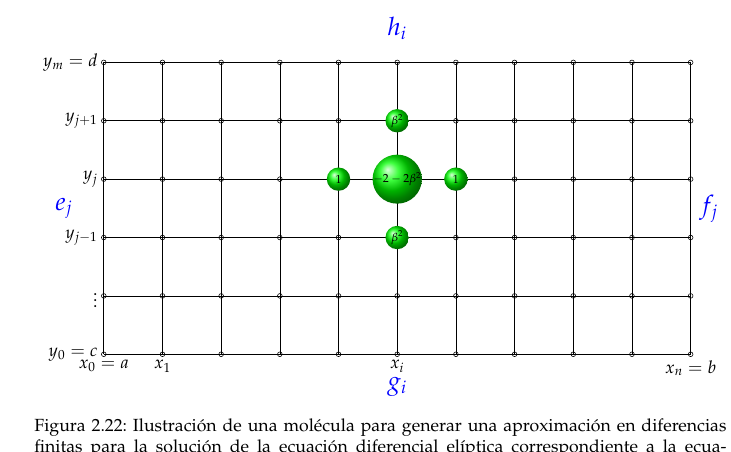

In [1]:
import numpy as np

# create a 2D array
arr = np.array([[1, 2, 3], [4, 5, 6]])

# print the array
print(arr)

# flatten the array
flat_arr = arr.flatten()

# print the flattened array
print(flat_arr)

[[1 2 3]
 [4 5 6]]
[1 2 3 4 5 6]


## Elaboracion del algoritmo
Lo que vamos a hacer es un "flatten" a la matriz $w$.

La forma de hacerlo es



\begin{eqnarray}
11 &\mapsto 1& \quad 21 \mapsto 2 \quad \cdots \quad  (nx-1)1 \mapsto nx-1  \\
12 &\mapsto& nx \quad 22 \mapsto nx+1 \quad \cdots \quad (nx-1)2 \mapsto 2(nx-1)  \\
\vdots &\vdots& \quad  \vdots  \quad \vdots \quad \vdots
\end{eqnarray}
La ultima fila es

\begin{eqnarray}
1(ny-1) &\mapsto& (ny-2)\times (nx-1) + 1 \\
2(ny-1) &\mapsto& (ny-2)\times (nx-1) + 2 \\
&\vdots& \\
(nx-1)(ny-1) &\mapsto& (nx-1) \times (ny-1)
\end{eqnarray}

Esto de forma general es

$$ij \mapsto (j-1)(nx-1) + i = \ell \quad , \quad 1 \le i \le nx-1 \quad , \quad 1 \le j \le ny-1 $$

Usaremos el siguiente mapeo

$$w_{ij} \mapsto w_{\ell} = w_{(j-1)(nx-1) + i} $$

Vamos a obtner el sistema

$$ A w = b $$
Debemos hallar $A, b$.

Centramos la molecula en el primer nodo vivo que es $1$

$$g_1 \beta^2 + e_1 - 2(1 + \beta^2) w_1 + w_2 +
0 w_3 + \cdots 0 w_{nx-1} + \beta^2 w_{nx} + 0 w_{nx-1} +
\cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_1 $$






los  dos primeros terminos los pasamos para la derecha.

$$- 2(1 + \beta^2) w_1 + w_2 +
0 w_3 + \cdots 0 w_{nx-1} + \beta^2 w_{nx} + 0 w_{nx-1} +
\cdots + 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_1 - g_1 \beta^2 - e_1$$

Ahora ponemos la estrella centrada en $(2,1)$ con valor mapeado a $\ell=2$.

$$ g_1 \beta^2 + w_1 -2(1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots 0 w_{nx} + \beta^2 w_{nx+1} + \cdots 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2 $$

Igualmente pasamos los terminos de frontera a la derecha.

$$  w_1 -2(1 + \beta^2) w_2 + w_3 + 0 w_4 + \cdots 0 w_{nx} + \beta^2 w_{nx+1} + \cdots 0 w_{(nx-1)(ny-1)} = \Delta x^2 \rho_2 - g_1 \beta^2 $$


Vamonos hasta la penultima casilla de la primera capa. Es decir
$(nx-2 1)$, $\ell=nx-2$.

$\beta^2 g_{nx-2} + 0 w_1 + \cdots + 0 w_{nx-4} + w_{nx-3} - 2(1  + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + \beta^2 w_{2nx-3} + 0 w_{2nx-2} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-2} \Delta x^2$

Pasamos a la derecha el temino de frontera

$$ 0 w_1 + \cdots + 0 w_{nx-4} + w_{nx-3} - 2(1  + \beta^2) w_{nx-2} + w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + \beta^2 w_{2nx-3} + 0 w_{2nx-2} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-2} \Delta x^2 - \beta^2 g_{nx-2} $$

Centramos la molecula en el ultimo nodo de la primera capa.

$\ell = nx-1$

$$\beta^2 g_{nx-1} + 0 w_1 + \cdots 0 w_{nx-3} + w_{nx -2}
-2(1 + \beta^2)_{nx-1} + f_1  + 0 w_{nx} + \cdots + 0 w_{2nx-3} + \beta^2 w_{2 nx -2} + 0 w_{2 nx-1} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-1} \Delta x^2 $$

Pasamos terminos de la frontera a la derecha.

$$ 0 w_1 + \cdots 0 w_{nx-3} + w_{nx -2}
-2(1 + \beta^2)_{nx-1} +  0 w_{nx} + \cdots + 0 w_{2nx-3} + \beta^2 w_{2 nx -2} + 0 w_{2 nx-1} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx-1} \Delta x^2 - \beta^2 g_{nx-1} - f_1 $$


Vamos a la segunda capa (despues del descanso).
$\ell=nx$

$$\beta^2 w_1 + 0 w_2 + \cdots 0 w_{nx-1} + e_2 - 2(1 + \beta^2) w_{nx} + w_{nx+1} + 0 w_{nx+2} + \cdots + 0 w_{2nx-2} + \beta^2 w_{2 nx-1} + 0 w_{2 nx} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx} \Delta x^2 $$

Movemos a la derecha el termino de frontera $e_2$.

$$\beta^2 w_1 + 0 w_2 + \cdots 0 w_{nx-1} - 2(1 + \beta^2) w_{nx} + w_{nx+1} + 0 w_{nx+2} + \cdots + 0 w_{2nx-2} + \beta^2 w_{2 nx-1} + 0 w_{2 nx} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx} \Delta x^2 - e_2 $$

Centramos la molecula en el nodo $(2,2)$, $\ell=nx+1$.

Esta es la primera ecuacion sin frontera.

$$\beta^2 w_2 + 0 w_3 + \cdots 0 w_{nx} -2(1 +  \beta^2)w_{nx+1}
 + w_{nx+2} + 0 w_{nx+3} + \cdots 0 w_{2nx -3} + \beta^2 w_{2nx-1} + 0 w_{2nx} + \cdots + 0 w_{(nx-1)(ny-1)} = \rho_{nx+1} \Delta x^2$$

Centramos la molecula en el nodo $(nx-1,2)$ con $\ell=2 nx-2$.


$$\beta^2 w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + w_{2nx-3} - 2(1 + \beta^2) +  w_{2 nx -2} + f_2 + 0 w_{2nx-1} + \cdots + 0 w_{3 nx-4} + w_{3nx-3} + 0 w_{2nx -2} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{2 nx-2} \Delta x^2 $$

Pasamos el termino de frontera $f_2$ a la derecha

$$\beta^2 w_{nx-1} + 0 w_{nx} + \cdots + 0 w_{2nx-4} + w_{2nx-3} - 2(1 + \beta^2) w_{2 nx -2} 0 w_{2nx-1} + \cdots + 0 w_{3 nx-4} + w_{3nx-3} + 0 w_{2nx -2} + \cdots 0 w_{(nx-1)(ny-1)} = \rho_{2 nx-2} \Delta x^2- f_2. $$

El patron es el mismo. Nos vemos a $(ny-2,1)$, correspondiente
a $\ell=(ny-3)(nx-1) + 1$.

El nodo $(ny-2, nx-1)$ va a $\ell=(ny-2) \times (nx-1)$.

$$\beta^2 w_{(ny-3)(nx-1)}  0 w_{(ny-3)(nx-1)+1} + \cdots + 0
-2(1 + \beta^2) w_{(ny-2)(nx-1)} + w_{(ny-2)(nx-1)+1} + 0 w_((ny-2)(nx-1) + 2 + \cdots +  0 w_{(ny-1)(nx-1)} = \rho_{(ny-2)(nx-1)} - f_{ny-1} $$

Vamos a la ultima posicion.
$(nx-1, ny-1)$ aca $\ell=(nx-1) \times (ny-1)$.

$$\beta^2 w_{(ny-2)(nx-1)} + 0 w_{(nx-2)(nx-1)+1} +
\cdots 0 w_{(ny-1)(nx-1)-2} + w_{(ny-1)(nx-1)-1}
- 2(1 + \beta^2) w_{(ny-1)(nx-1)} = \rho_{(ny-1)(nx-1)} \Delta x^2 - \beta^2 h_{nx-1} - f_{ny-1}  $$



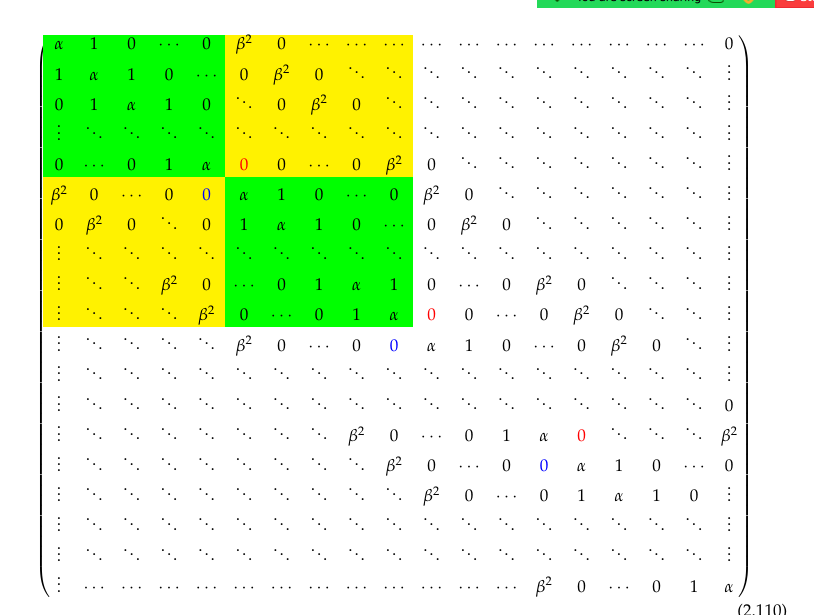

Donde $\alpha=-2( 1  + \beta^2)$ .La estructura de esta matriz es de la forma.

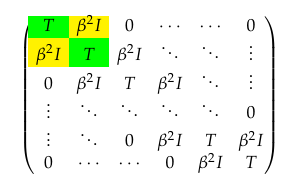

Donde $I$ es la identidad de orden $(nx-1) \times (nx-1)$ y $T$
es una matriz tridiagonal

$$T =
\begin{pmatrix}
\alpha & 1 & 0 & \cdots & 0 \\
1 & \alpha  & 1 & \ddots & \vdots \\
0 & 1 & \alpha & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \cdots & 0 & 1 & \alpha
\end{pmatrix} $$

Otra forma de entender la matriz pentadiagonal es mediante el siguiente diagrama.


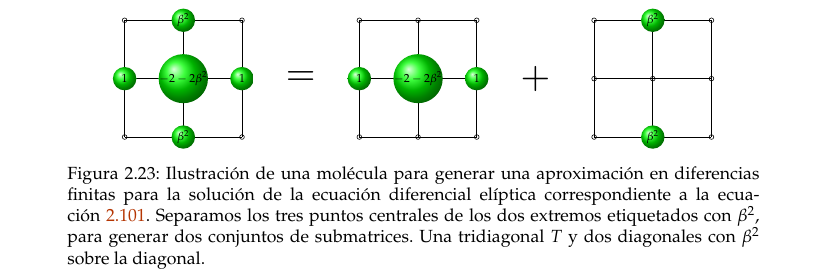

El vector $b$ esta dado por

$$b_\ell = \Delta x^2 \rho_\ell - c_\ell$$

Donde

$c_\ell=  (e_1 + g_1 \beta^2 , g_2 \beta^2, \cdots g_{nx-1} \beta^2, e_2, 0, \cdots, 0, f_2, e_3, 0, \cdots, 0, f_3, \cdots, \cdots, e_{nx-2}, 0, \cdots, 0, f_{nx-2} ,
e_{ny-1} h_1 \beta^2, h_2 \beta^2, \cdots, h_{nx-2} \beta^2 + h_{nx-1} \beta^2 + f_{ny-1})$